In [4]:
from tools import data_loader
import numpy as np
import polars as pl



20231210_area_map.ipynb


In [25]:

train_log = pl.read_parquet("../data/train_log.parquet")
train_label = pl.read_parquet("../data/train_label.parquet")
yado = pl.read_parquet("../data/yado.parquet")

In [8]:
yado

yad_no,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd
i64,i64,f64,f64,i64,f64,f64,f64,f64,str,str,str,str
1,0,129.0,1.0,0,1.0,null,null,1.0,"""f0112abf369fb0…","""072c85e1653e10…","""449c52ef581d5f…","""677a32689cd1ad…"
2,0,23.0,1.0,0,null,null,null,null,"""d86102dd9c232b…","""b4d2fb4e51ea7b…","""5c9a8f48e9df02…","""4ee16ee838dd27…"
3,0,167.0,1.0,1,1.0,null,null,1.0,"""46e33861f921c3…","""572d60f0f5212a…","""8a623b960557e8…","""ab9480fd72a44d…"
4,0,144.0,1.0,0,1.0,null,null,1.0,"""46e33861f921c3…","""107c7305a74c8d…","""52c9ea83f2cfe9…","""1cc3e1838bb0fd…"
5,0,41.0,1.0,1,null,null,null,null,"""43875109d1dab9…","""75617bb07a2785…","""9ea5a911019b66…","""be1b876af18afc…"
6,0,9.0,1.0,1,null,null,null,1.0,"""8a1c0d3243bba1…","""ce83563814cff3…","""230a892f40289e…","""e5e2f95a6c898e…"
7,0,14.0,1.0,0,1.0,null,null,null,"""46e33861f921c3…","""107c7305a74c8d…","""d153c8fd78bfad…","""93bb8a3bdcfb29…"
8,0,111.0,1.0,0,null,null,null,1.0,"""f0112abf369fb0…","""072c85e1653e10…","""449c52ef581d5f…","""677a32689cd1ad…"
9,0,52.0,1.0,0,null,null,null,1.0,"""f0112abf369fb0…","""072c85e1653e10…","""bd8bc296d0c3e7…","""a4d15da8bc58c9…"


In [9]:
wid_cd_map = {
    "321b69d5eec98fe6253e26b86058e6a9": "北陸",
    "3300cf6f774b7c6a5807110f244cbc21": "甲信越",
    "43875109d1dab93592812c50d18270a7": "四国",
    "46e33861f921c3e38b81998fbf283f01": "首都圏",
    "89e181a40914767dfee00fa2b7c2dcb5": "沖縄",
    "8a1c0d3243bba111cbcd1ec6c692dc6d": "北関東",
    "b07b75d367ebece55a23ceecc939fff4": "北海道",
    "c312e07b7a5d456d53a5b00910a336e1": "東北",
    "d86102dd9c232bade9a97dccad40df48": "山陰・山陽",
    "dc414a17890cfc17d011d5038b88ca93": "東海",
    "e9316013ee1b03f4525fe361c46ce9c5": "九州",
    "f0112abf369fb03cdc5f5309300913da": "近畿",
}

# ken_cd_map = {
#     # 近畿
#     "ade0e32ad9713b41613b242ba618f776": "滋賀",
#     "ce3aaf25e7e38a0c42d373fb148efc86": "京都",
#     "072c85e1653e10c9c7dd065ad007125a": "大阪",
#     "bd054cc265d68a400ccb976ac69c6463": "兵庫",
#     "470fa9ac04f80c7e13db398668e124bf": "奈良",
#     "fec19ba0016c012f3a06360cfff6da32": "和歌山",
#     #四国
#     "3b09a7ce9934c00fd266f9cf246308d1": "愛媛",
    
#     "
    
    
    
    
# }


In [76]:
pl.Config.set_tbl_cols(10)
pl.Config.set_tbl_rows(20)
pl.Config.set_fmt_str_lengths(n=70)
print(yado[["wid_name", "ken_cd", "lrg_cd"]].unique().sort(by=["wid_name", "ken_cd"]).group_by("wid_name", "ken_cd").count().filter(pl.col("wid_name")=="首都圏"))
print(yado[["wid_name", "ken_cd", "lrg_cd", "sml_cd"]].unique().group_by("wid_name", "ken_cd","lrg_cd").count().sort(by="ken_cd").filter(pl.col("wid_name")=="首都圏"))

shape: (4, 3)
┌──────────┬──────────────────────────────────┬───────┐
│ wid_name ┆ ken_cd                           ┆ count │
│ ---      ┆ ---                              ┆ ---   │
│ str      ┆ str                              ┆ u32   │
╞══════════╪══════════════════════════════════╪═══════╡
│ 首都圏   ┆ 107c7305a74c8dcc4f143de208bf7ec2 ┆ 13    │
│ 首都圏   ┆ 572d60f0f5212aacda515ebf81fb0a3a ┆ 8     │
│ 首都圏   ┆ 83522288daa2f3a0010f79df27c38ea5 ┆ 6     │
│ 首都圏   ┆ c86352f5b57e80fe545cfec1fd8505a1 ┆ 8     │
└──────────┴──────────────────────────────────┴───────┘
shape: (35, 4)
┌──────────┬──────────────────────────────────┬──────────────────────────────────┬───────┐
│ wid_name ┆ ken_cd                           ┆ lrg_cd                           ┆ count │
│ ---      ┆ ---                              ┆ ---                              ┆ ---   │
│ str      ┆ str                              ┆ str                              ┆ u32   │
╞══════════╪══════════════════════════════════╪════════════

In [81]:

# yado = yado.with_columns(
#     yado['wid_cd'].apply(lambda x: wid_cd_map.get(x, "Unknown")).alias('wid_name')
# )

In [97]:
enumerated = train_log.with_columns(
    pl.arange(pl.count(), 0, -1).over("session_id").alias("enum")
)
print(enumerated)
# Step 3: Pivot the table
pivoted = enumerated.pivot(index="session_id", columns="enum", values="yad_no")
pivoted = pivoted.select(["session_id"]+[pl.col(f"{i}").alias(f"yad_{i}") for i in range(1, 11)])
# pivoted = pivoted.select(["session_id", "1", "2", "3", "4"])
# # Step 4: Fill missing values with null
# result = pivoted.fill_none("null")
print(pivoted)


shape: (419_270, 4)
┌──────────────────────────────────┬────────┬────────┬──────┐
│ session_id                       ┆ seq_no ┆ yad_no ┆ enum │
│ ---                              ┆ ---    ┆ ---    ┆ ---  │
│ str                              ┆ i64    ┆ i64    ┆ u32  │
╞══════════════════════════════════╪════════╪════════╪══════╡
│ 000007603d533d30453cc45d0f3d119f ┆ 0      ┆ 2395   ┆ 1    │
│ 0000ca043ed437a1472c9d1d154eb49b ┆ 0      ┆ 13535  ┆ 1    │
│ 0000d4835cf113316fe447e2f80ba1c8 ┆ 0      ┆ 123    ┆ 1    │
│ 0000fcda1ae1b2f431e55a7075d1f500 ┆ 0      ┆ 8475   ┆ 1    │
│ …                                ┆ …      ┆ …      ┆ …    │
│ ffffcd5bc19d62cad5a3815c87818d83 ┆ 1      ┆ 10619  ┆ 2    │
│ ffffcd5bc19d62cad5a3815c87818d83 ┆ 2      ┆ 12230  ┆ 1    │
│ fffffa7baf370083ebcdd98f26a7e31a ┆ 0      ┆ 2439   ┆ 2    │
│ fffffa7baf370083ebcdd98f26a7e31a ┆ 1      ┆ 11822  ┆ 1    │
└──────────────────────────────────┴────────┴────────┴──────┘
shape: (288_698, 11)
┌────────────────────────────

In [98]:
pivoted_feature = pivoted
for i in range(10):
    pivoted_feature = pivoted_feature.join(yado, how="left", left_on=f"yad_{i+1}", right_on="yad_no", suffix=(f'_{i+1}'))
    # 不要になった yad_no 列を削除
    # expanded_df = expanded_df.drop(columns=["yad_no"])

In [99]:
pivoted_feature


session_id,yad_1,yad_2,yad_3,yad_4,yad_5,yad_6,yad_7,yad_8,yad_9,yad_10,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd,yad_type_2,total_room_cnt_2,wireless_lan_flg_2,onsen_flg_2,kd_stn_5min_2,kd_bch_5min_2,kd_slp_5min_2,kd_conv_walk_5min_2,wid_cd_2,ken_cd_2,lrg_cd_2,sml_cd_2,yad_type_3,total_room_cnt_3,…,sml_cd_7,yad_type_8,total_room_cnt_8,wireless_lan_flg_8,onsen_flg_8,kd_stn_5min_8,kd_bch_5min_8,kd_slp_5min_8,kd_conv_walk_5min_8,wid_cd_8,ken_cd_8,lrg_cd_8,sml_cd_8,yad_type_9,total_room_cnt_9,wireless_lan_flg_9,onsen_flg_9,kd_stn_5min_9,kd_bch_5min_9,kd_slp_5min_9,kd_conv_walk_5min_9,wid_cd_9,ken_cd_9,lrg_cd_9,sml_cd_9,yad_type_10,total_room_cnt_10,wireless_lan_flg_10,onsen_flg_10,kd_stn_5min_10,kd_bch_5min_10,kd_slp_5min_10,kd_conv_walk_5min_10,wid_cd_10,ken_cd_10,lrg_cd_10,sml_cd_10
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,f64,f64,f64,f64,str,str,str,str,i64,f64,f64,i64,f64,f64,f64,f64,str,str,str,str,i64,f64,…,str,i64,f64,f64,i64,f64,f64,f64,f64,str,str,str,str,i64,f64,f64,i64,f64,f64,f64,f64,str,str,str,str,i64,f64,f64,i64,f64,f64,f64,f64,str,str,str,str
"""000007603d533d…",2395,null,null,null,null,null,null,null,null,null,0,113.0,1.0,0,null,null,null,null,"""dc414a17890cfc…","""d78f53d0856617…","""4fd631b1511609…","""4044dac1931dda…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""0000ca043ed437…",13535,null,null,null,null,null,null,null,null,null,0,40.0,1.0,0,1.0,null,null,1.0,"""b07b75d367ebec…","""0a66f6ab9c0507…","""9ab5718fd88c6e…","""7aff71bb47acb7…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""0000d4835cf113…",123,null,null,null,null,null,null,null,null,null,0,17.0,1.0,0,null,null,null,null,"""46e33861f921c3…","""572d60f0f5212a…","""dac434451fe9bd…","""b7c56c5d2855b3…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""0000fcda1ae1b2…",8475,null,null,null,null,null,null,null,null,null,0,65.0,1.0,0,1.0,null,null,1.0,"""46e33861f921c3…","""107c7305a74c8d…","""3a6cd37aa9e38f…","""f2fcbd8e628721…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""000104bdffaaad…",898,96,null,null,null,null,null,null,null,null,0,145.0,1.0,0,null,null,null,1.0,"""e9316013ee1b03…","""84efa50e52f9b4…","""a1370d90ed3b80…","""d72674f02c5340…",0,228.0,1.0,0,null,null,null,1.0,"""e9316013ee1b03…","""84efa50e52f9b4…","""a1370d90ed3b80…","""d72674f02c5340…",null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""00011afe25c343…",6868,null,null,null,null,null,null,null,null,null,0,23.0,1.0,0,null,null,null,1.0,"""43875109d1dab9…","""7d3db9a7acad53…","""34f448c0371e84…","""97de2b919a8ec1…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""000125c737df18…",8602,null,null,null,null,null,null,null,null,null,0,190.0,1.0,0,1.0,null,null,1.0,"""43875109d1dab9…","""3b09a7c

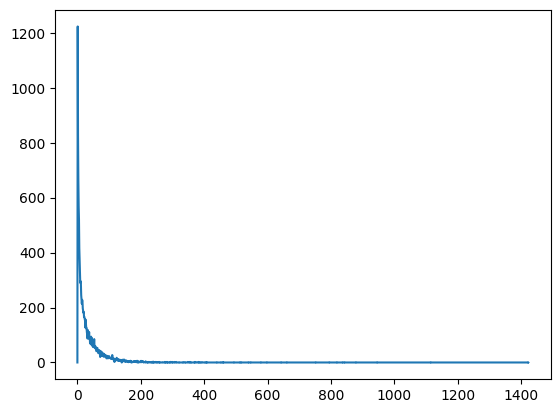

In [24]:
import matplotlib.pyplot as plt
plt.plot(train_log.group_by("yad_no").count()["count"].hist()["count_count"])



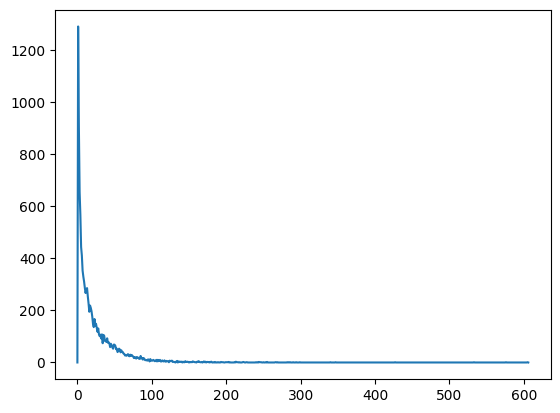

In [26]:
plt.plot(train_label.group_by("yad_no").count()["count"].hist()["count_count"])

/home/morim/repos/datascience/atmacup16/.venv/lib/python3.10/site-packages/polars/series/series.py:1207: RuntimeWarning: divide by zero encountered in log
  series = f(lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs))


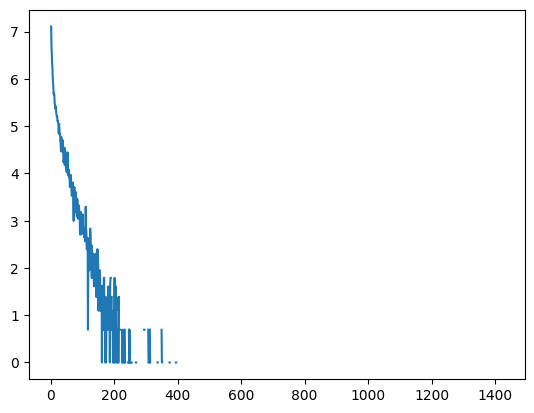

In [28]:
plt.plot(np.log(train_log.group_by("yad_no").count()["count"].hist()["count_count"]))

In [33]:
hist = train_log.group_by("yad_no").count()["count"].hist()
x = hist["break_point"]
y = hist["count_count"]

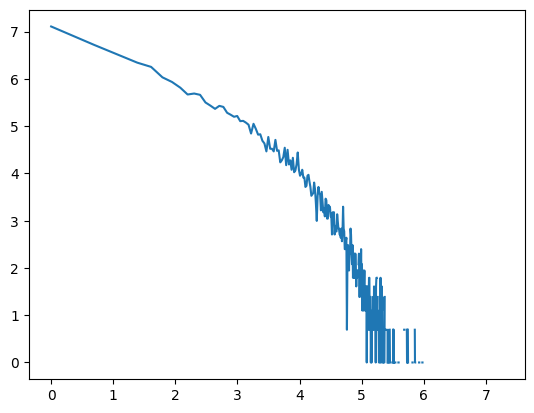

In [34]:
plt.plot(np.log(x), np.log(y))

In [45]:
joined = train_label.join(yado, on="yad_no")
joined.group_by("ken_cd").count().sort(by="count", descending=True)
ade0e32ad9713b41613b242ba618f776

ken_cd,count
str,u32
"""107c7305a74c8d…",38962
"""0a66f6ab9c0507…",22219
"""072c85e1653e10…",20443
"""66c4d01ad8e301…",15309
"""c86352f5b57e80…",14602
"""d78f53d0856617…",13948
"""572d60f0f5212a…",11952
"""6920865be128aa…",11403
"""bd054cc265d68a…",9222
